In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.max_rows", None, "display.max_columns", None)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from warnings import filterwarnings as w
w('ignore')

In [148]:
dataset = pd.read_csv('IPL_score.csv')
data = dataset.copy()

# Data Cleaning

In [149]:
#data.head()
data.isnull().sum() #no null values

In [150]:
#bat_team: 
#pune supergiant and pune supergiants be the same
data['bat_team'] =  data['bat_team'].apply(lambda x: "Rising Pune Supergiant" if x == 'Rising Pune Supergiants' else x)
data['bowl_team'] = data['bowl_team'].apply(lambda x: "Rising Pune Supergiant" if x == 'Rising Pune Supergiants' else x)


#Removing teams that are not present in the current season
data = data[(data['bat_team']!='Deccan Chargers') & (data['bat_team']!='Kochi Tuskers Kerala') & (data['bat_team']!='Pune Warriors') & (data['bat_team']!= 'Gujarat Lions')]
data = data[(data['bowl_team']!='Deccan Chargers') & (data['bowl_team']!='Kochi Tuskers Kerala') & (data['bowl_team']!='Pune Warriors') & (data['bowl_team']!= 'Gujarat Lions')]

#bowl_team
print(data['bat_team'])

0        Kolkata Knight Riders
1        Kolkata Knight Riders
2        Kolkata Knight Riders
3        Kolkata Knight Riders
4        Kolkata Knight Riders
                 ...          
76009           Mumbai Indians
76010           Mumbai Indians
76011           Mumbai Indians
76012           Mumbai Indians
76013           Mumbai Indians
Name: bat_team, Length: 56645, dtype: object


In [151]:
#Date:
data['day'] = pd.to_datetime(data['date'], format = "%Y/%m/%d").dt.day
data['month'] = pd.to_datetime(data['date'], format = "%Y/%m/%d").dt.month
data['year'] = pd.to_datetime(data['date'], format = "%Y/%m/%d").dt.year

data.drop('date', axis=1, inplace = True)

# EDA

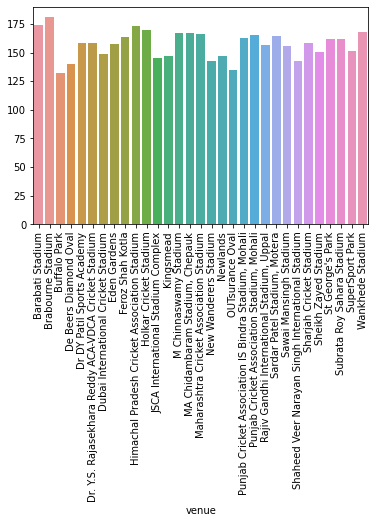

In [152]:
#venue vs total
venue_scores = pd.pivot_table(data, index = 'venue', values = 'total')

plot = sns.barplot(x = venue_scores.index, y = venue_scores.values.reshape(len(venue_scores),))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

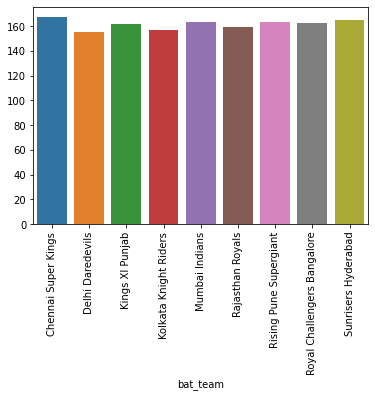

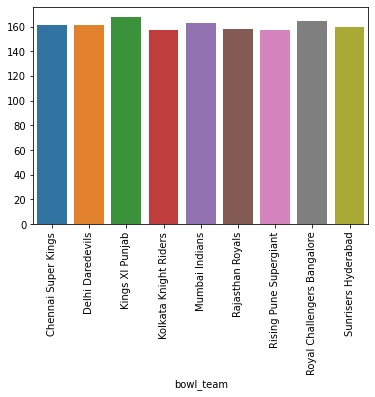

In [154]:
#bat_team vs total: the higher the score, the better the team
bat_scores = pd.pivot_table(data, index = 'bat_team', values = 'total')
plot = sns.barplot(x = bat_scores.index, y = bat_scores.values.reshape(len(bat_scores),))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()


#bowl vs total: The lower the score, the better the team
bowl_scores = pd.pivot_table(data, index = 'bowl_team', values = 'total')
plot = sns.barplot(x = bowl_scores.index, y = bowl_scores.values.reshape(len(bowl_scores),))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

# MODELS

In [139]:
#Data prep for modelling:

#dummies for teams and players
data = pd.get_dummies(data, columns = ['venue','bat_team','bowl_team','batsman','bowler'])

In [140]:
def adjusted_r2(ytest,ypred,xtest):
    adj_r2 = 1-(((1-r2_score(ytest,ypred))*(len(xtest)-1))/(len(xtest)-len(xtest.iloc[0,:])-1))
    return adj_r2

xtrain = data[data['year']<=2016]
xtest = data[data['year']==2017]
ytrain = data[data['year']<=2016]['total']
ytest = data[data['year']==2017]['total']


x = data.drop(['total'], axis=1)
y = data['total']


In [143]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [144]:
#Evaluation
kfold = KFold(n_splits = 5, shuffle = False)
print("cross validation score: ", np.mean(cross_val_score(model, x,y, cv = kfold)))
print("R2: ", r2_score(ytest,ypred))
print("adjusted_r2: ", adjusted_r2(ytest,ypred,xtest))
print("MSE: ", mean_squared_error(ytest,ypred))

R2:  0.9991412055323285
adjusted_r2:  0.9990131221602726
MSE:  0.8192437961429094


In [145]:
#linear regression:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred1 = lr.predict(xtest)
print("R2: ", r2_score(ytest,ypred1))
print("adjusted_r2: ", adjusted_r2(ytest,ypred1,xtest))
print("MSE: ", mean_squared_error(ytest,ypred1))

R2:  0.9999999998426207
adjusted_r2:  0.9999999998191486
MSE:  1.5013144070263947e-07


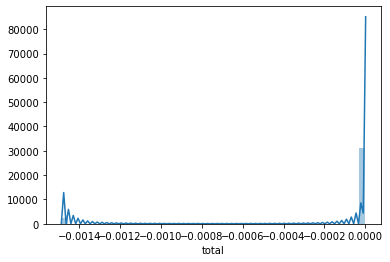

In [155]:
#LR: 
sns.distplot(ypred1-ytest)

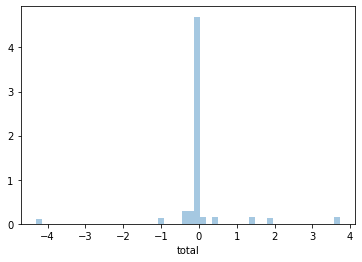

In [156]:
#RF:
sns.distplot(ypred-ytest)